In [12]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

# For viewing the Tensor Graph. 

from tensorflow.python.summary.writer.writer import FileWriter
from matplotlib import pyplot

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
# To view the tensorgraph, we use the TensorBoard. 

%load_ext tensorboard

In [5]:
pip list | grep tensorflow

tensorflow                         2.5.0
tensorflow-estimator               2.5.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
print(tf.__version__)

2.5.0


In [8]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
                        # sets the graph-level random seed

tf.random.set_seed(42)

In [9]:
# Use the MNIST dataset  of Keras.

mnistDataSetFromKeras = tf.keras.datasets.mnist

In [62]:
(Xtrain, Ytrain) , (Xtest, Ytest) = mnistDataSetFromKeras.load_data()

In [17]:
Xtrain.shape

(60000, 28, 28)

In [18]:
Ytrain.shape

(60000,)

In [19]:
Xtest.shape

(10000, 28, 28)

In [20]:
Ytest.shape

(10000,)

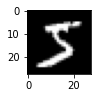

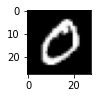

In [15]:
for i in range(2):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Xtrain[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

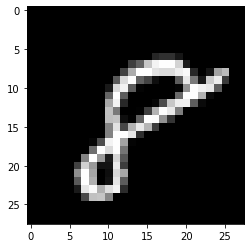

In [26]:
pyplot.imshow(Xtrain[59999], cmap=pyplot.get_cmap('gray'))

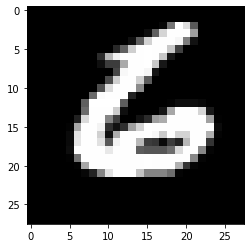

In [32]:
pyplot.imshow(Xtest[9999], cmap=pyplot.get_cmap('gray'))

In [34]:
Ytrain[59999]

8

In [35]:
Ytest[9999]

6

In [39]:
Xtrain[59999].shape

(28, 28)

In [44]:
Xtrain[59999,20]

array([  0,   0,   0,   0,   0,   0,  66, 209, 153,  19,  19, 233,  60,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [52]:
Xtrain.shape

(60000, 28, 28)

In [64]:
Xtrain[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [65]:
# Normalize the data
# 60000 input images are in the Xtrain set.
# 10000 input images are in the Xtest set.

Xtrain = Xtrain.reshape(60000, 28*28)    # reshape the input set to size 28*28. 

In [66]:
Xtrain.shape

(60000, 784)

In [67]:
Xtrain[59999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [68]:
Xtrain[0].size

784

In [69]:
Xtrain[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [71]:
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

In [73]:
Xtrain[59999].size

784

In [98]:
Xtrain[0].shape

(784,)

In [100]:
type(Xtrain[0])

numpy.ndarray

In [112]:
Xtrain[0][783]

0.0

In [76]:
Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

In [78]:
Xtest[0].size

784

In [79]:
Xtest[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [80]:
Ytrain[0]

5

In [81]:
Ytest[0]

7

In [82]:
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [86]:
Ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [84]:
Ytest[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [90]:
# Create a model object

dnnModel = models.Sequential()

In [92]:
# Layer 1 == input layer == Specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape=(784,)))

In [93]:
# Layer 2 = hidden layer 

dnnModel.add(layers.Dense(60, activation='relu'))

In [94]:
# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))

In [95]:
# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

In [96]:
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
_________________________________________________________________


In [113]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [114]:
# train the model

model_fit  = dnnModel.fit( Xtrain, Ytrain, epochs=25, batch_size=64)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3516 - acc: 0.8944
Epoch 2/25
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1528 - acc: 0.9541
Epoch 3/25
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1143 - acc: 0.9653
Epoch 4/25
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0923 - acc: 0.9715
Epoch 5/25
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0778 - acc: 0.9763
Epoch 6/25
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0666 - acc: 0.9794
Epoch 7/25
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0570 - acc: 0.9818
Epoch 8/25
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0503 - acc: 0.9835
Epoch 9/25
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0439 - acc: 0.9853
Epoch 10/25
60000/60000 [==============================] - 

In [115]:
print('Final training loss \t', model_fit.history['loss'][-1])
print('Final training accuracy ', model_fit.history['acc'][-1])

Final training loss 	 0.014693695326095137
Final training accuracy  0.99525


In [118]:
Ytest[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [119]:
# testing the model

testingDataLoss, testingDataAccuracy = dnnModel.evaluate(Xtest, Ytest)

/Users/B0218162/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [121]:
print('Testing loss \t', testingDataLoss)
print('Testing accuracy ', testingDataAccuracy)

Testing loss 	 0.15377163568547178
Testing accuracy  0.9735


In [122]:
model_fit

In [124]:
model_fit.history['loss']

[0.3515797962943713,
 0.15282238809665044,
 0.11432202107807,
 0.09229494310816129,
 0.07775956479857365,
 0.06659413579531635,
 0.056994061564902464,
 0.05033849680845936,
 0.04389863588946561,
 0.03975742787135144,
 0.03621283808139463,
 0.03247316998420283,
 0.0290285223606353,
 0.025862666033767162,
 0.02421060783358601,
 0.02416990898285682,
 0.020515890708309597,
 0.017950552829246347,
 0.019686622175481172,
 0.018743809636356308,
 0.01540052454318211,
 0.01546341736599182,
 0.016394407366324838,
 0.011838549207489996,
 0.014693695326095137]